#### Importing the necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as snb


#### Loading the data

In [2]:
df_salary_data = pd.read_csv('./Salary_Data.csv')


#### Reading the first 10 rows of the data to get a sense of the data

In [3]:
df_salary_data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
df_salary_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
df_salary_data.shape

(6704, 6)

#### The data consist of 6704 rows (persons) and 6 columns (features) 

In [6]:
df_salary_data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [7]:
df_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


#### Checking to see if there are null values in the respective columns of the data

In [8]:
for column in df_salary_data.columns:
    print(df_salary_data[column].isna().sum())

2
2
3
2
3
5


#### Looking at the subset of the data that has NaN values

##### We can see all the nan values in the various columns using the syntax below 

In [9]:
df_salary_data[df_salary_data.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [10]:
filter_full_stack_engineer = (df_salary_data['Job Title'] == 'Full Stack Engineer') & (df_salary_data['Years of Experience'] == 8)
#filter_full_stack_engineer
df_salary_data.loc[filter_full_stack_engineer, ['Job Title','Salary', 'Years of Experience']]

,Job Title,Salary,Years of Experience
1229,Full Stack Engineer,140000.0,8.0
1326,Full Stack Engineer,140000.0,8.0
1409,Full Stack Engineer,140000.0,8.0
1670,Full Stack Engineer,145000.0,8.0
1689,Full Stack Engineer,145000.0,8.0
1708,Full Stack Engineer,145000.0,8.0
1727,Full Stack Engineer,145000.0,8.0
1746,Full Stack Engineer,145000.0,8.0
1765,Full Stack Engineer,145000.0,8.0
1780,Full Stack Engineer,145000.0,8.0


##### Calculating the average salary of full stack engineers with 8 years of experience

In [11]:
mean_full_stack_salary = df_salary_data['Salary'][(df_salary_data['Job Title'] == 'Full Stack Engineer') & (df_salary_data['Years of Experience'] == 8.0)].mean()
print(f"The average salary of full stack engineers with 8 years of experience is {mean_full_stack_salary}") 

The average salary of full stack engineers with 8 years of experience is 133079.22727272726


##### Since all the Full Stack Engineers with 8 years of experience have salaries, we replace the salary of the Full Stack Engineer with no salary with the mean salary of the Full Stack Engineers with 8 years of experience. 

In [12]:
df_salary_data.loc[3136, 'Salary'] = mean_full_stack_salary

In [13]:
df_salary_data.loc[filter_full_stack_engineer, ['Job Title','Salary', 'Years of Experience']]

,Job Title,Salary,Years of Experience
1229,Full Stack Engineer,140000.000000,8.0
1326,Full Stack Engineer,140000.000000,8.0
1409,Full Stack Engineer,140000.000000,8.0
1670,Full Stack Engineer,145000.000000,8.0
1689,Full Stack Engineer,145000.000000,8.0
1708,Full Stack Engineer,145000.000000,8.0
1727,Full Stack Engineer,145000.000000,8.0
1746,Full Stack Engineer,145000.000000,8.0
1765,Full Stack Engineer,145000.000000,8.0
1780,Full Stack Engineer,145000.000000,8.0


##### Now we have changed the salary of the Full Stack Engineer who previously had a NaN value to the mean salary.


##### Now the number of rows that contain NaN in any column has reduced from 6 to 5 

##### Using the same approach, we can replace the NaN salary value of the sales director with the mean salary of all sales directors with the same years of experience.

In [14]:
filter_sales_director = (df_salary_data['Job Title'] == 'Sales Director') & (df_salary_data['Years of Experience'] == 6)
# filter_sales_director 
df_salary_data.loc[filter_sales_director , ['Job Title','Salary', 'Years of Experience']]

,Job Title,Salary,Years of Experience
6306,Sales Director,75000.0,6.0
6360,Sales Director,75000.0,6.0
6385,Sales Director,75000.0,6.0
6399,Sales Director,75000.0,6.0
6413,Sales Director,75000.0,6.0
6427,Sales Director,75000.0,6.0
6441,Sales Director,75000.0,6.0
6455,Sales Director,NaN,6.0
6504,Sales Director,75000.0,6.0
6518,Sales Director,75000.0,6.0


In [15]:
mean_sales_directors = df_salary_data['Salary'][(df_salary_data['Job Title'] == 'Sales Director') & (df_salary_data['Years of Experience'] == 6)].mean()
print(f"The average salary of sales with directors 6 years of expeience is {mean_sales_directors} ") 
df_salary_data.loc[6455,'Salary'] = mean_sales_directors

df_salary_data.loc[filter_sales_director, ['Job Title','Salary', 'Years of Experience']]

The average salary of sales with directors 6 years of expeience is 75000.0 


,Job Title,Salary,Years of Experience
6306,Sales Director,75000.0,6.0
6360,Sales Director,75000.0,6.0
6385,Sales Director,75000.0,6.0
6399,Sales Director,75000.0,6.0
6413,Sales Director,75000.0,6.0
6427,Sales Director,75000.0,6.0
6441,Sales Director,75000.0,6.0
6455,Sales Director,75000.0,6.0
6504,Sales Director,75000.0,6.0
6518,Sales Director,75000.0,6.0


##### Now we can delete all the rows that have NaN values in any of their columns since the information missing cannot be replaced

In [16]:
df_salary_data.dropna(inplace=True)

## Let's look at some relationships in the data

#### The graph below shows the number of individuals with specific years of experience

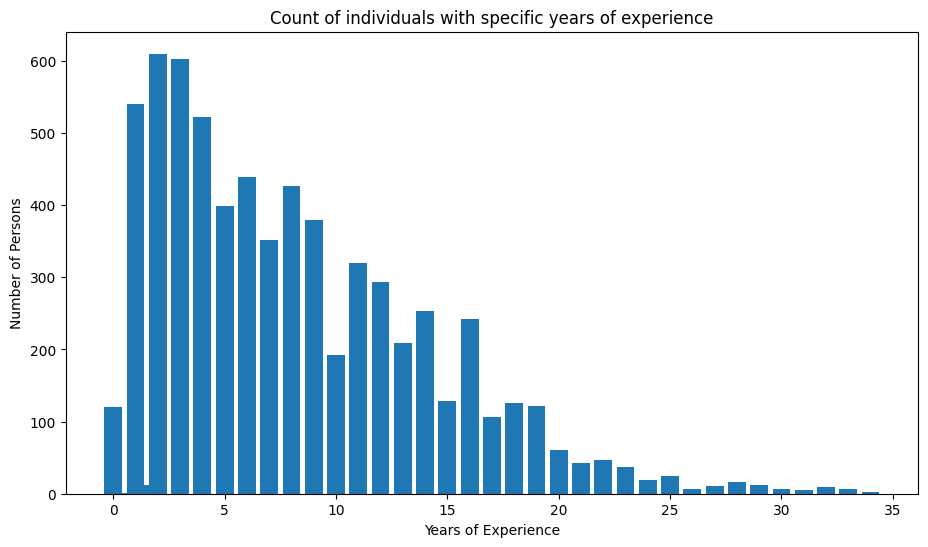

In [17]:
val_counts = df_salary_data.groupby('Years of Experience').count().loc[:,'Age']

unique_years_of_experience = val_counts.index
counts = val_counts.values

plt.figure(figsize=(11,6))
plt.title('Count of individuals with specific years of experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Persons')
plt.bar(unique_years_of_experience, counts)
plt.show()

##### As we can see from the graph, most of the individuals have between 2 and 4 years of experience in their field. Only a few individuals have more than 25 years of expenrience in their related field.

#### A plot showing the number of individuals who receive the same salary for each salary category.

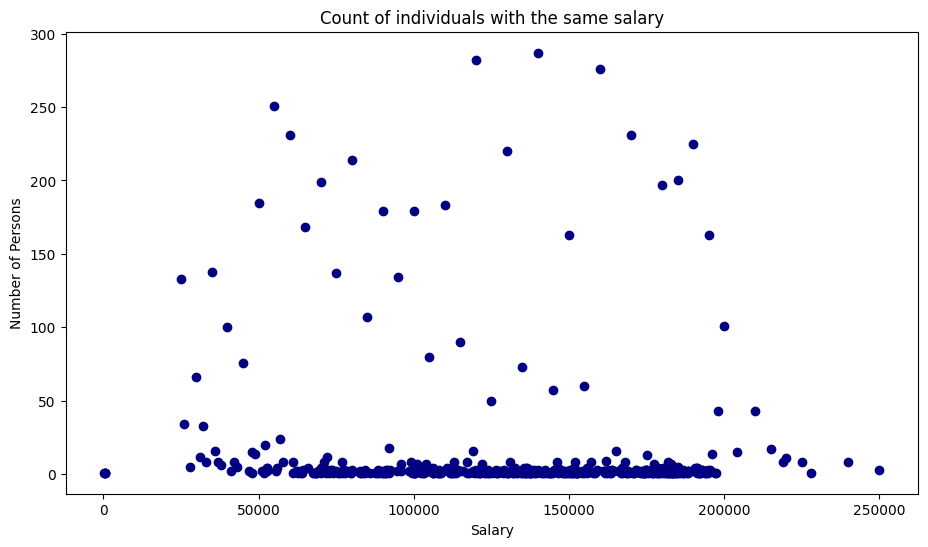

In [18]:
sal_counts = df_salary_data.groupby('Salary').count().loc[:,'Age']
sal_index = sal_counts.index
sal_value = sal_counts.values


plt.figure(figsize=(11,6))
plt.title('Count of individuals with the same salary')
plt.xlabel('Salary')
plt.ylabel('Number of Persons')
plt.scatter(sal_index, sal_value, color='navy')
plt.show()

##### From the graph, we can see that for each salary category, only a few number of individuals receive that amount. Only a few salary categories have more individuals who receive that payment amount.

#### The chart below shows the number of individuals that are working in the same field

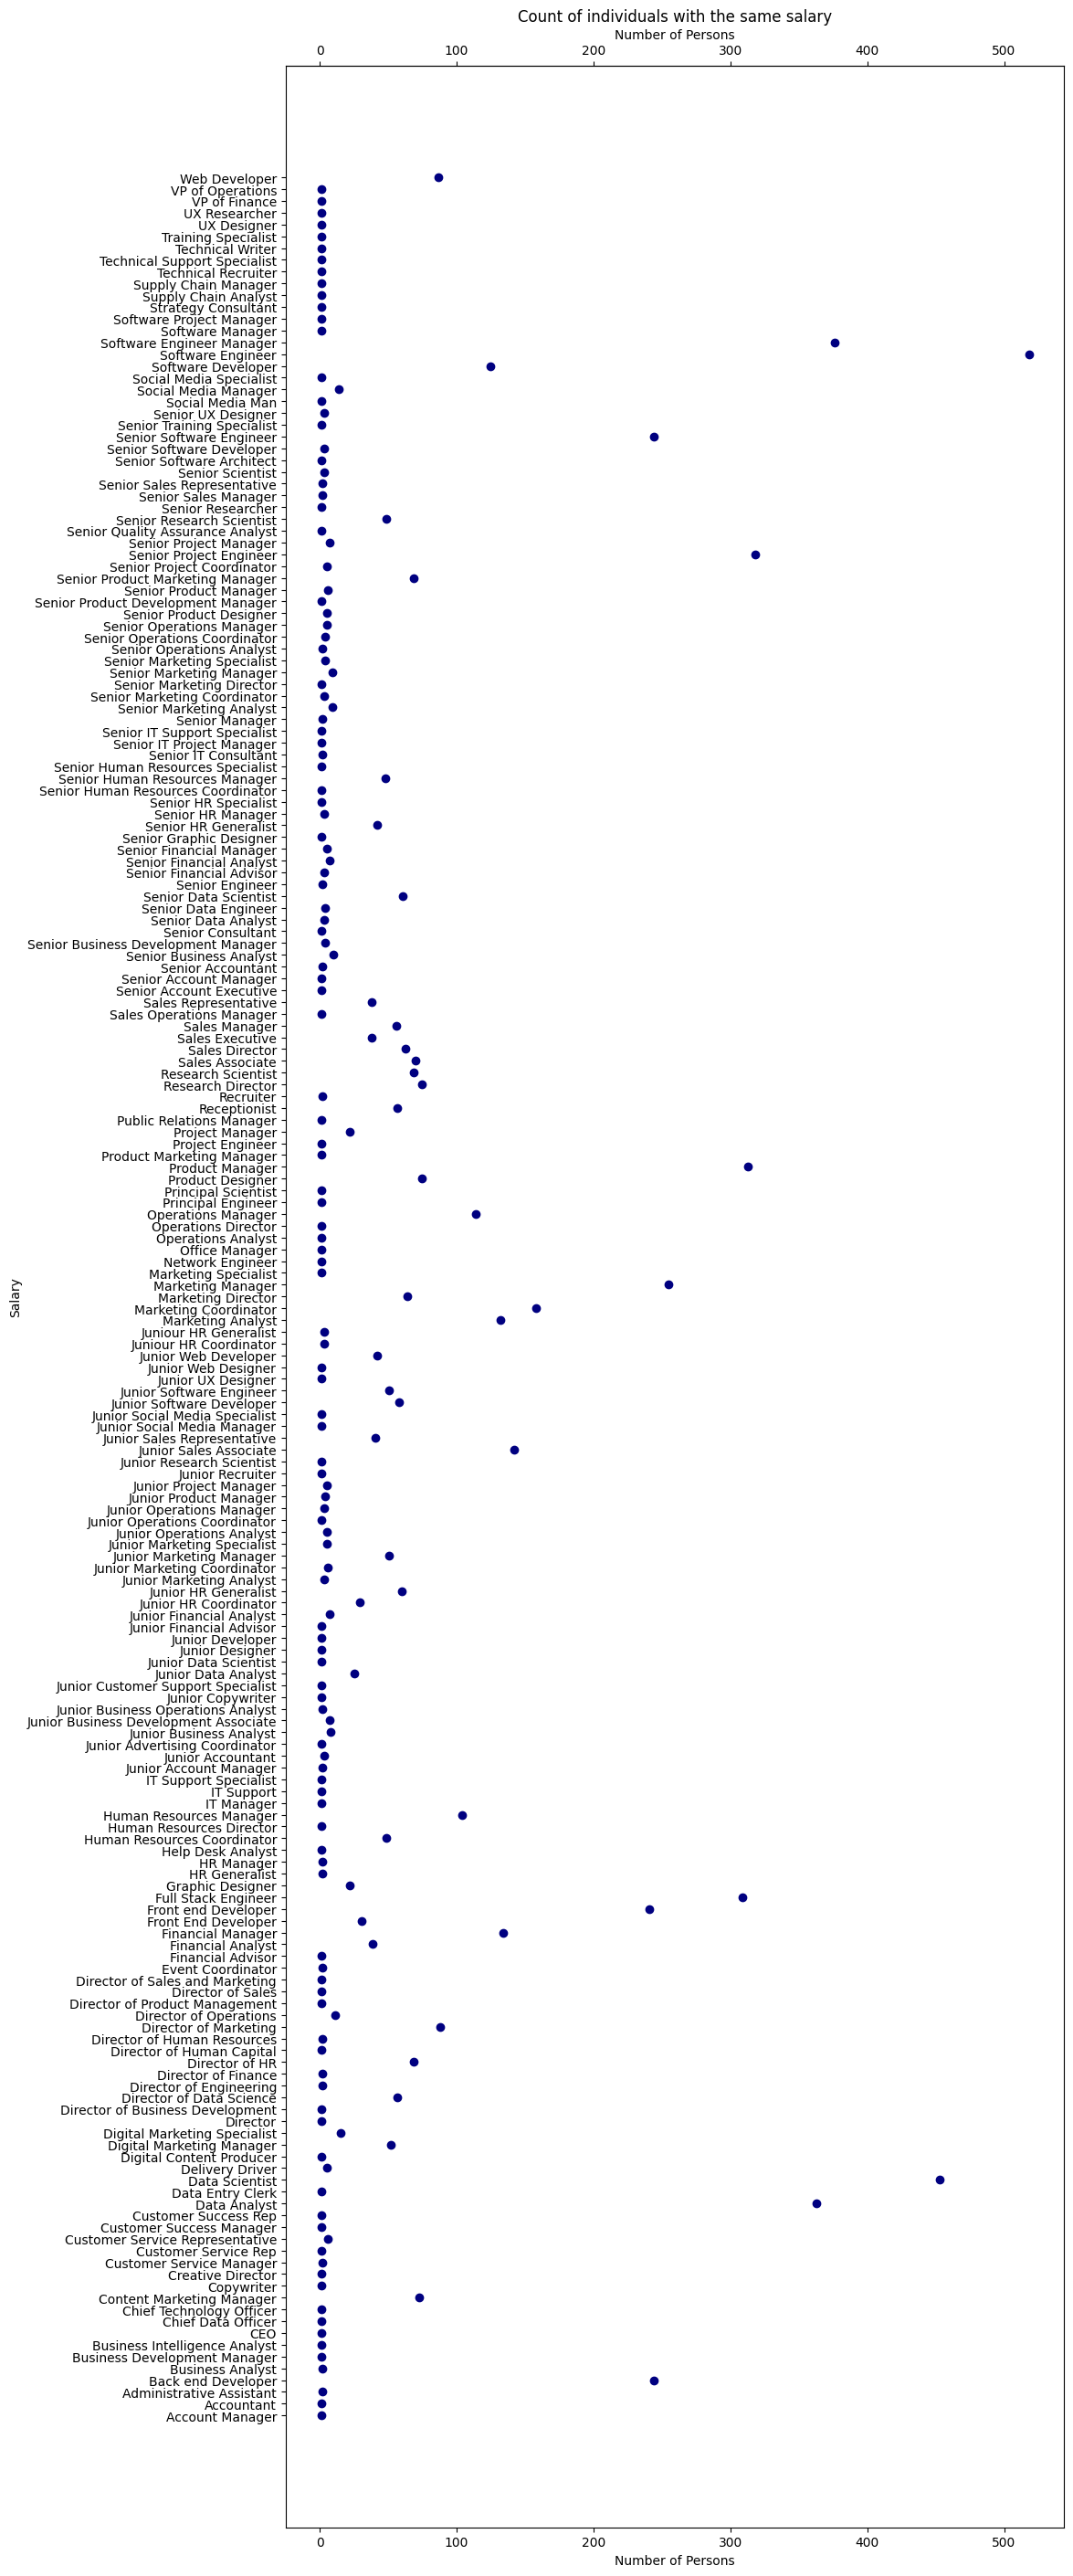

In [19]:
jobs = df_salary_data.groupby('Job Title').count().loc[:,'Age']

job_index = jobs.index
job_value = jobs.values


fig, ax = plt.subplots(1,1,figsize=(11,35))
ax.set_title('Count of individuals with the same salary')
ax.set_ylabel('Salary')
ax.set_xlabel('Number of Persons')
secax = ax.secondary_xaxis('top')
secax.set_xlabel('Number of Persons')
plt.scatter(job_value, job_index, color='navy')
plt.show()

##### As we can see from the plot above, most of the jobs have only a few individuals in that field. Also, most of the tech jobs have a few number of individuals working there. This implies on average, more more like to work in the tech sector.

#### Years of Experience and their corresponding salary

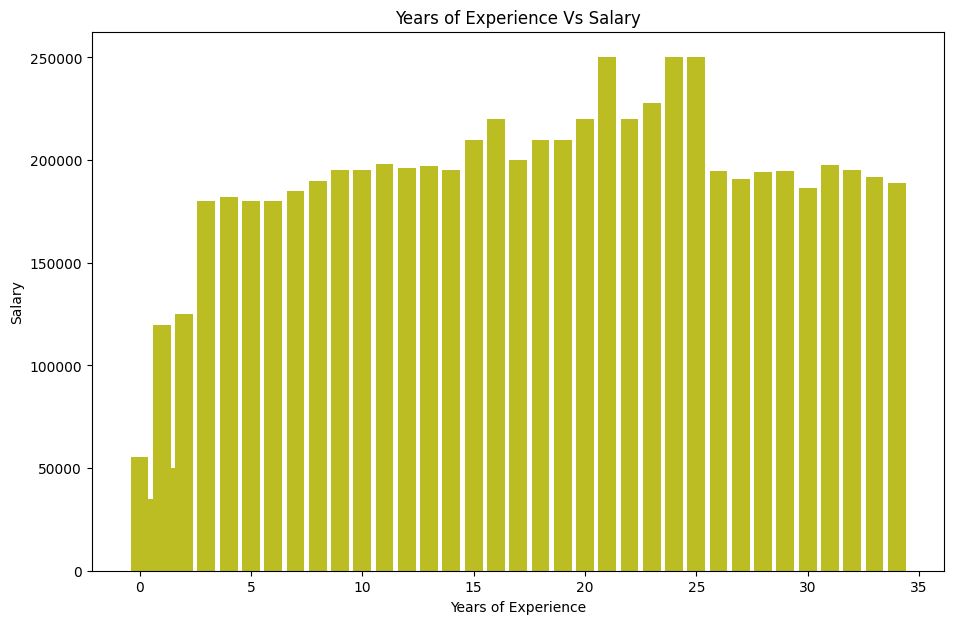

In [20]:
plt.figure(figsize=(11,7))
plt.bar(df_salary_data['Years of Experience'], df_salary_data['Salary'], color='tab:olive')
plt.title('Years of Experience Vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

##### The graph above shows persons with years of experience between 21 and 25 years as having the highest salary. In general, persons with fewer years of experience have smaller salaries.

##### Establishing the relationship between the age and years of experience.

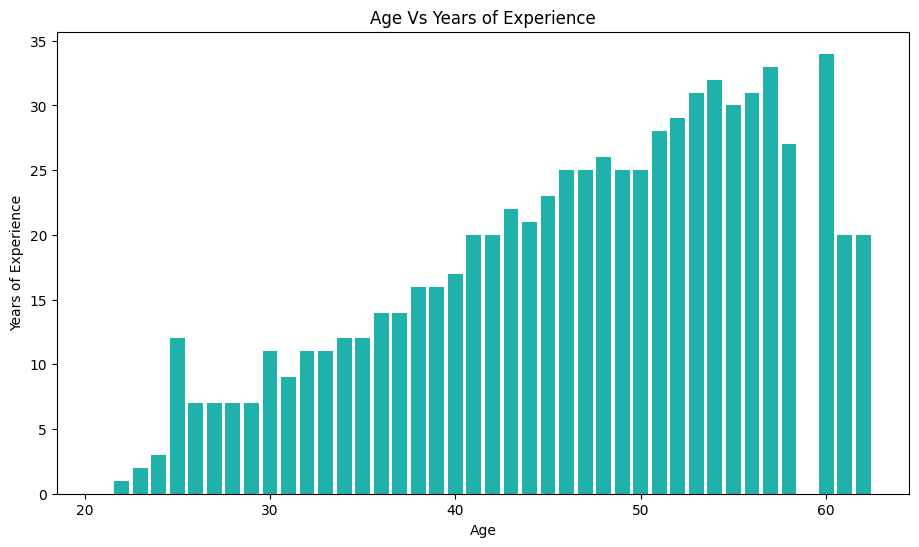

In [21]:
plt.figure(figsize=(11,6))
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.title('Age Vs Years of Experience')
plt.bar(df_salary_data['Age'], df_salary_data['Years of Experience'], color='lightseagreen')
plt.show()

##### The graph is skewed to the left which indicates an increase in years of experience as the age also increases.

#### Establish the relationship between age and salary

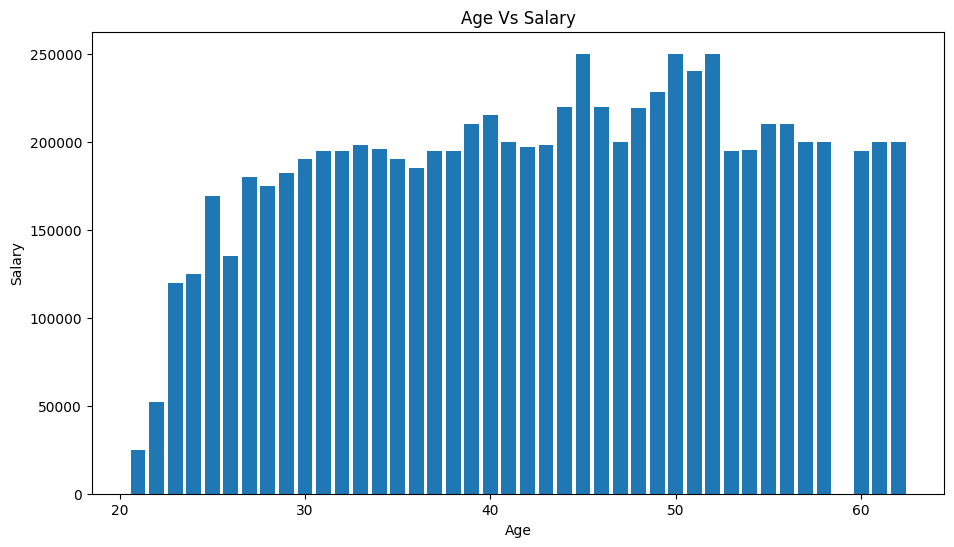

In [22]:
plt.figure(figsize=(11,6))
plt.title('Age Vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.bar(df_salary_data['Age'], df_salary_data['Salary'])
plt.show()

##### As we can see in the graph above, younger persons have smaller salaries compared to older inividuals. This corresponds to the previous graph which depicts that on average, younger persons have fewer years of experience compared to older individuals. Since the number of years of experience is a major determiner in the amount of salary one gets, this is a reasonable observation.

#### Establishing the relationship between the jobs with highest salaries and those with least salaries.

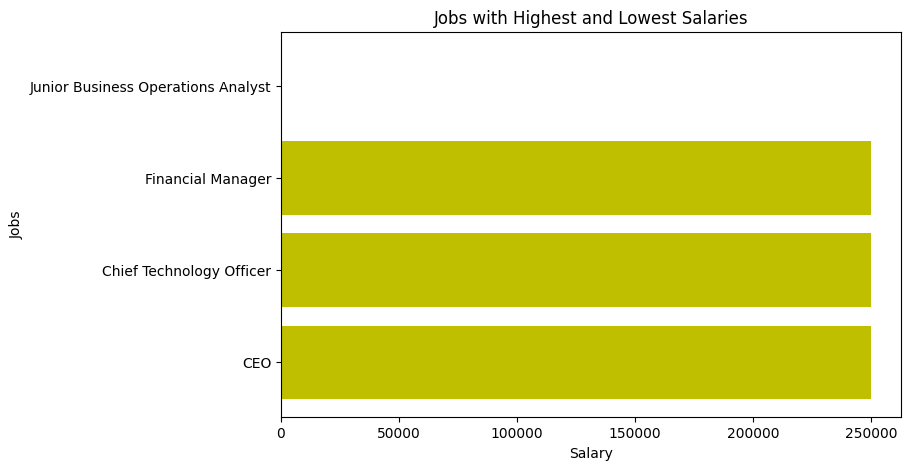

In [23]:
max_salary = df_salary_data['Salary'].max()
min_salary = df_salary_data['Salary'].min()
max_paying_job = []
min_paying_job = []
for job, sal in zip(df_salary_data['Job Title'], df_salary_data['Salary']):
    if sal == max_salary:
        max_paying_job.append(job)
    elif (sal == min_salary):
        min_paying_job.append(job)


min_max_salary = [max_salary,max_salary,max_salary,min_salary]
min_max_jobs = [max_paying_job,min_paying_job]
min_max_jobs = list(itertools.chain(*min_max_jobs))


plt.figure(figsize=(8,5))
plt.barh(min_max_jobs, min_max_salary, color='y')
plt.title('Jobs with Highest and Lowest Salaries')
plt.xlabel('Salary')
plt.ylabel('Jobs')
# plt.xticks(rotation=45)
plt.show()


##### From the graph above, it is obvious that the highest paying jobs are CEO, Chief Technology Officer, and Financial Manager, whiles the minimum paying job is Junior Business Operations Analyst. We cannot see any bin for the Junior Business Operations Analysts because, their salaries are much smaller compared with that of the other jobs in the graph.

##### Viewing the distinct education levels in the data.

In [24]:
df_salary_data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

##### Since some rows have different names representing the same data, we change it to a common name. Example; we change Master's to Master's Degree, phD to PhD 


In [25]:
filt_masters = (df_salary_data['Education Level'] == 'Master\'s')
filt_bachelors = (df_salary_data['Education Level'] == "Bachelor's")
filt_phd = (df_salary_data['Education Level'] == "phD")
df_salary_data.loc[filt_masters, 'Education Level'] = "Master's Degree"
df_salary_data.loc[filt_bachelors, 'Education Level'] = "Bachelor's Degree"
df_salary_data.loc[filt_phd, 'Education Level'] = "PhD"

In [26]:
df_salary_data['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

##### Now all the rows in similar categories have the same value.

#### Plotting the various levels of education attained by the population

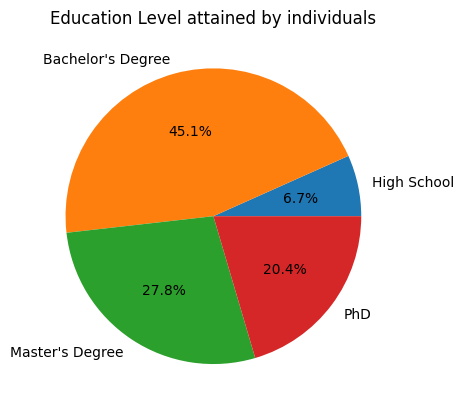

In [27]:
high_school =  df_salary_data.groupby('Education Level').count().loc['High School', 'Age']
bachelors =  df_salary_data.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters =  df_salary_data.groupby('Education Level').count().loc["Master's Degree", 'Age']
phd =  df_salary_data.groupby('Education Level').count().loc['PhD', 'Age']

values = [high_school,bachelors,masters,phd]


plt.title('Education Level attained by individuals')
plt.pie(values, labels=['High School', "Bachelor's Degree", "Master's Degree", 'PhD'], startangle=0, autopct='%1.1f%%');
plt.show()

##### From the graph above, we can see that most of the individuals in the population have bachelor's degree and only a small percentage of the population have high school certificate as the highest education level attained. A fair amount of the population have master's degree and PhD's.

#### Establishing the relationship between the highest education level attained and the corresponding salary.

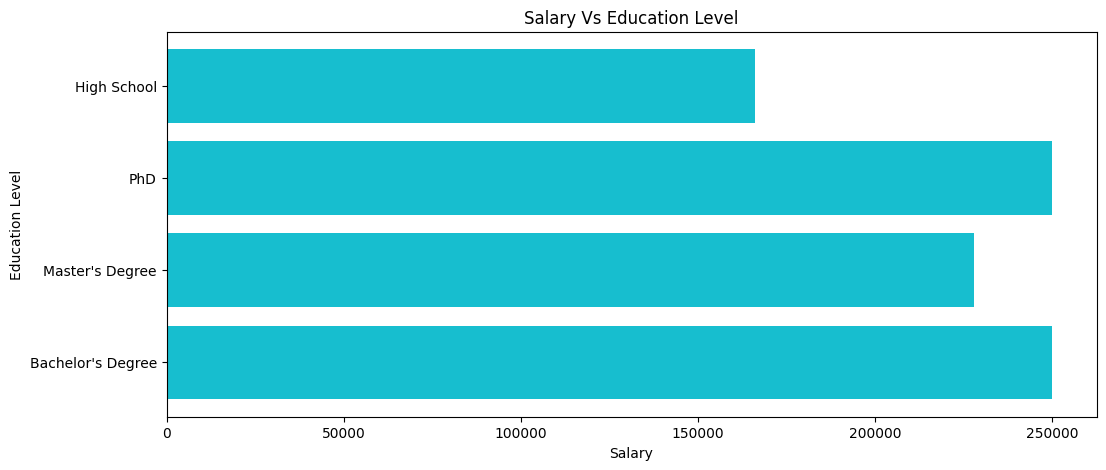

In [28]:
plt.figure(figsize=(12,5))
plt.title('Salary Vs Education Level')
plt.xlabel('Salary')
plt.ylabel('Education Level')
#plt.xticks(rotation=70)
#bar_colors = ['blue', 'red']
plt.barh(df_salary_data['Education Level'], df_salary_data['Salary'], color='tab:cyan')
plt.show()


##### From the graph, individuals with PhD and Bachelor's degree receive the highest salary. It is a bit confusing that persons with Master's degree are rather receiving lower salaries than those with bachelor's degree. 

##### Let's take a look at individuals with bachelors degree and the jobs they normally do as this could provide some meaning to the observation above. 

In [29]:
filt_bachelors = (df_salary_data['Education Level'] == "Bachelor's Degree")
most_common_job_bachelors = df_salary_data.loc[filt_bachelors, 'Job Title'].max()
print(f"The most common job for individuals with bachelor's degree is {most_common_job_bachelors}")

The most common job for individuals with bachelor's degree is Web Developer


#####  Most individuals with bachelor's degree have jobs as web developers. Since this is a well paying job, it accounts for why persons with bachelors degree have higher salaries than those with master's degree.  

#### Establishing the relationship between the proportion of different genders in the population.

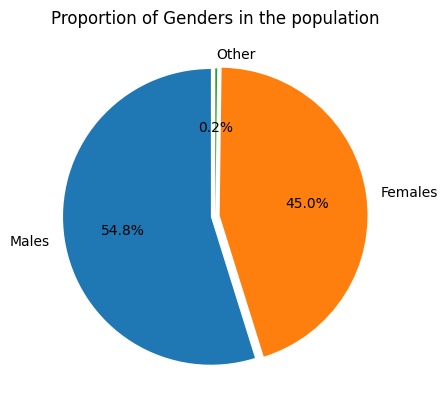

In [30]:
male_count = df_salary_data[df_salary_data['Gender'] == 'Male'].count()
male_count = male_count['Gender']
female_count = df_salary_data[df_salary_data['Gender'] == 'Female'].count()
female_count = female_count['Gender']
other_count = df_salary_data[df_salary_data['Gender'] == 'Other'].count()
other_count = other_count['Gender']


sizes = [male_count, female_count, other_count]



explode = [0.03,0.03,0]

plt.title('Proportion of Genders in the population')
plt.pie(sizes, labels=['Males', 'Females','Other'], startangle=90, autopct='%1.1f%%', explode=explode);
plt.show()

##### The figure above shows the proportion the gender of the total population. Most individuals identify as males and females whereas a few have other genders. The males dominate the population. 

##### The graph below shows the various genders and the dominant age.

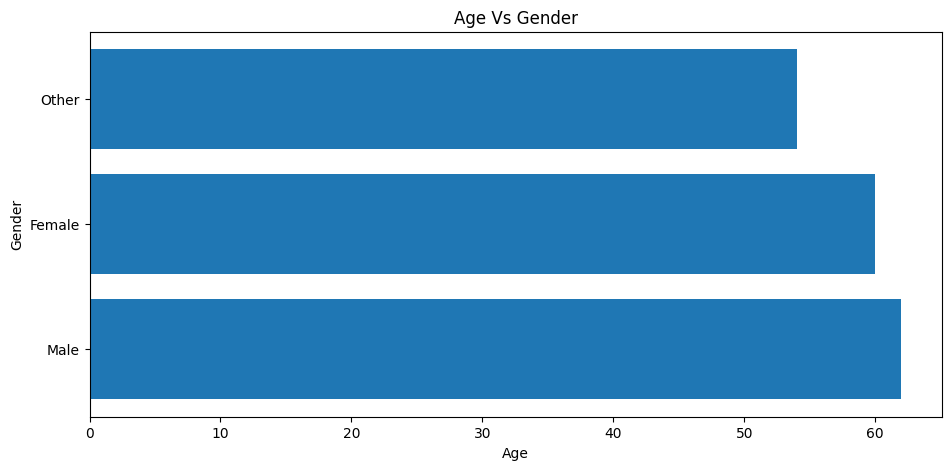

In [31]:
plt.figure(figsize=(11,5))
plt.title('Age Vs Gender')
plt.ylabel('Gender')
plt.xlabel('Age')
plt.barh(df_salary_data['Gender'], df_salary_data['Age'],)
plt.show()


##### It can be seen that most of the males fall between the ages of 0 and 60, the females fall between the ages of 0 and around 58 and the rest are between 0 and 54.

#### Let's take a look at the relationship between the education level and the age

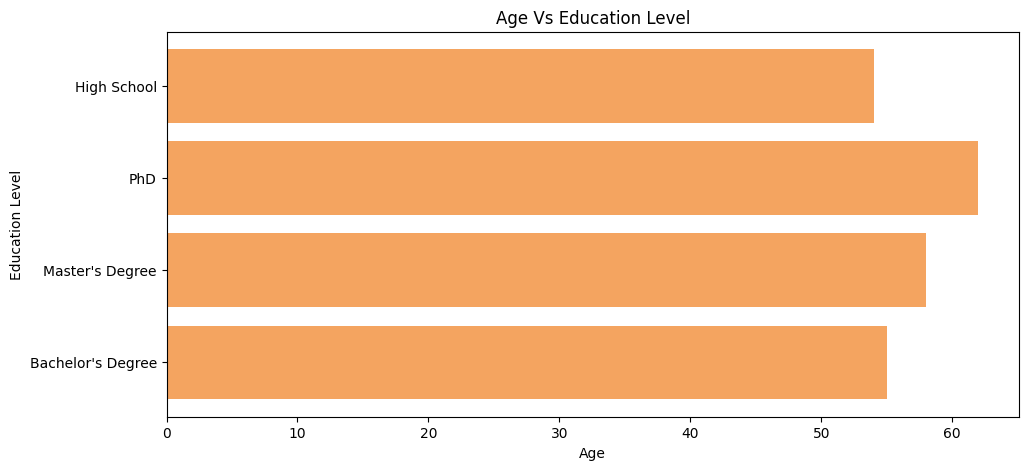

In [32]:
plt.figure(figsize=(11,5))
plt.title('Age Vs Education Level')
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.barh(df_salary_data['Education Level'], df_salary_data['Age'], color='sandybrown')
plt.show()

##### From the chart above, it can be seen that individuals in various levels of education have ages that span 0 and around 52 years. Those with PhD have the highest range (0 to 60) and those in high school have the lowest range (0 to about 52) 

## The subsequent graphs shows the relationship between a few of the most popular tech jobs and the education level of individuals in that field

#### Software Engineers

The total number of individuals who work as software engineers are 518


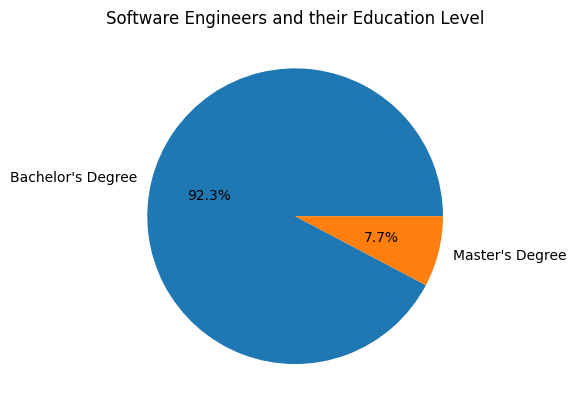

In [33]:
software = df_salary_data[df_salary_data['Job Title'] == 'Software Engineer']
total_software = software['Education Level'].count()
print(f"The total number of individuals who work as software engineers are {total_software}")

bachelors_software = software.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_software = software.groupby('Education Level').count().loc["Master's Degree", 'Age']

values_n = [bachelors_software,masters_software]
plt.title('Software Engineers and their Education Level')
plt.pie(values_n, labels=["Bachelor's Degree","Master's Degree"], startangle=0, autopct='%1.1f%%');
plt.show()


##### As we can see from the graph, only individuals who have attained an education level of bachelors or masters work as sofware engineers. Out of te total number of software engineers, only 7.7% have their masters.

#### Full Stack Engineers

The total number of individuals who work as full stack engineers are 309


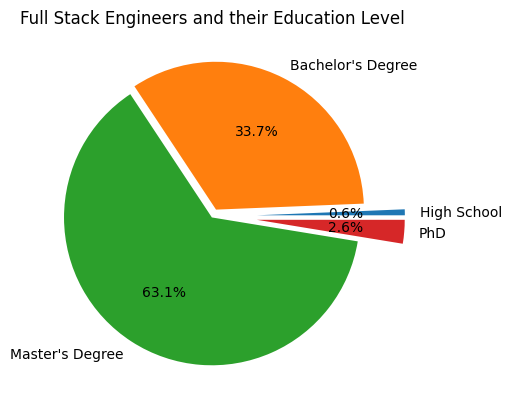

In [34]:
full_stack = df_salary_data[df_salary_data['Job Title'] == 'Full Stack Engineer']
#full_stack['Education Level'].unique()
total_full_stack = full_stack['Education Level'].count()
print(f"The total number of individuals who work as full stack engineers are {total_full_stack}")


high_school_full_stack = full_stack.groupby('Education Level').count().loc["High School", 'Age']
bachelors_full_stack = full_stack.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_full_stack = full_stack.groupby('Education Level').count().loc["Master's Degree", 'Age']
phd_full_stack = full_stack.groupby('Education Level').count().loc["PhD", 'Age']


values_n = [high_school_full_stack, bachelors_full_stack, masters_full_stack, phd_full_stack]
plt.title('Full Stack Engineers and their Education Level')
plt.pie(values_n, labels=["High School", "Bachelor's Degree","Master's Degree", "PhD"], startangle=0, autopct='%1.1f%%', explode=(0.3,0.05,0.01,0.3));
plt.show()

##### From the plot above, it can be deduced that individuals with various education levels can work as Full Stack Engineers and those with master's degree dominate.

#### Data Analysts

The total number of individuals who work as data analysts are 363


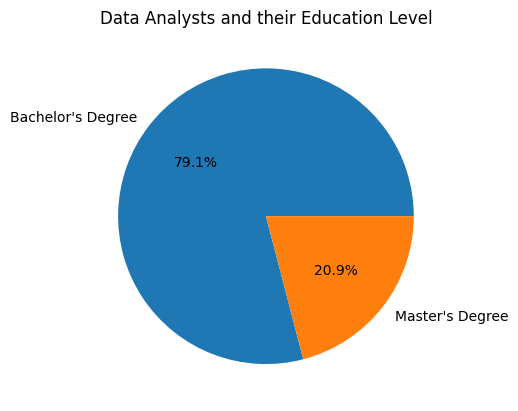

In [35]:
data_analyst = df_salary_data[df_salary_data['Job Title'] == 'Data Analyst']
data_analyst['Education Level'].unique()
total_data_analyst = data_analyst['Education Level'].count()
print(f"The total number of individuals who work as data analysts are {total_data_analyst}")



bachelors_data_analyst = data_analyst.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_data_analyst = data_analyst.groupby('Education Level').count().loc["Master's Degree", 'Age']


values_n = [bachelors_data_analyst,masters_data_analyst]
plt.title('Data Analysts and their Education Level')
plt.pie(values_n, labels=["Bachelor's Degree","Master's Degree"], startangle=0, autopct='%1.1f%%');
plt.show()

##### From the graph, we can deduce that individuals who work as data analysts have either a bachelor's degree or a master's degree, majority of whom have a bachelor's degree..

#### Web Developers

The total number of individuals who work as web developers are 87


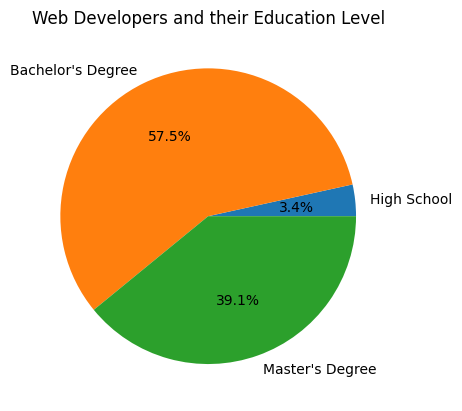

In [36]:
web_dev = df_salary_data[df_salary_data['Job Title'] == 'Web Developer']
web_dev['Education Level'].unique()
total_web_dev = web_dev['Education Level'].count()
print(f"The total number of individuals who work as web developers are {total_web_dev}")


high_school_web_dev = web_dev.groupby('Education Level').count().loc["High School", 'Age']
bachelors_web_dev = web_dev.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_web_dev = web_dev.groupby('Education Level').count().loc["Master's Degree", 'Age']


values_n = [high_school_web_dev, bachelors_web_dev, masters_web_dev]
plt.title('Web Developers and their Education Level')
plt.pie(values_n, labels=["High School", "Bachelor's Degree","Master's Degree"], startangle=0, autopct='%1.1f%%');
plt.show()

##### The majority of individuals who work as web developers have achelor's degree. There is no individual with a PhD that workd as a web developer.

#### Back End Developers

The total number of individuals who work as Back End Developers are 309


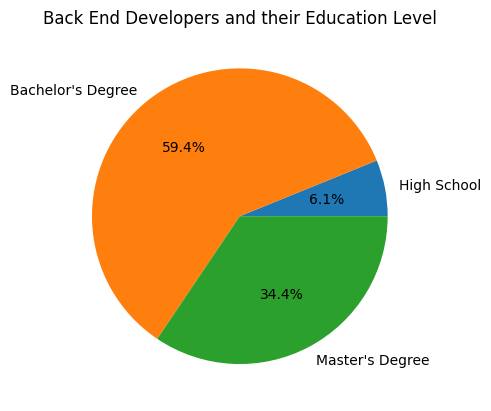

In [37]:
backend = df_salary_data[df_salary_data['Job Title'] == 'Back end Developer']
backend['Education Level'].unique()
total_backend = full_stack['Education Level'].count()
print(f"The total number of individuals who work as Back End Developers are {total_backend}")


high_school_backend = backend.groupby('Education Level').count().loc["High School", 'Age']
bachelors_backend = backend.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_backend = backend.groupby('Education Level').count().loc["Master's Degree", 'Age']



values_n = [high_school_backend, bachelors_backend, masters_backend]
plt.title('Back End Developers and their Education Level')
plt.pie(values_n, labels=["High School", "Bachelor's Degree","Master's Degree"], startangle=0, autopct='%1.1f%%');
plt.show()

##### There are 309 individuals who work as backend developers. 59.4% have attained a bachelor's degree, 34.4% have their master's degree and only 6.1% are high school graduates. There are no backend developers with PhD. 

#### Data Scientists

The total number of individuals who work as data scientists are 453


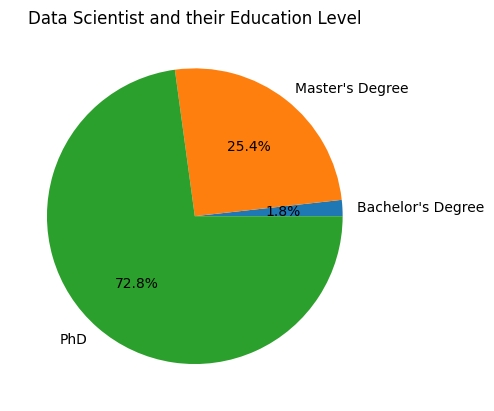

In [38]:
data_scientist = df_salary_data[df_salary_data['Job Title'] == 'Data Scientist']
data_scientist['Education Level'].unique()
total_data_scientist = data_scientist['Education Level'].count()
print(f"The total number of individuals who work as data scientists are {total_data_scientist}")


bachelors_data_scientist = data_scientist.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_data_scientist = data_scientist.groupby('Education Level').count().loc["Master's Degree", 'Age']
phd_data_scientist = data_scientist.groupby('Education Level').count().loc["PhD", 'Age']


values_n = [bachelors_data_scientist, masters_data_scientist, phd_data_scientist]
plt.title('Data Scientist and their Education Level')
plt.pie(values_n, labels=["Bachelor's Degree","Master's Degree", "PhD"], startangle=0, autopct='%1.1f%%');
plt.show()

##### As can be seen from the graph, most of the individuals who work as data scientists have PhD. Also, there are no high school graduates who work as data scientists. It is evident from the graph that only few individuals who work in this field have their bachelor's degree, whiles a fair number of the individuals have their masters. This observation implies, data science is a lucrative field and demands well learned individuals.

## The subsequent graphs shows the relationship between the genders and the education level attained.

#### Male Population

The total number of males are 3673


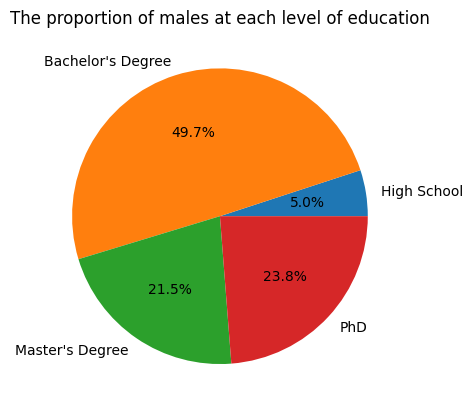

In [39]:
males = df_salary_data[df_salary_data['Gender'] == 'Male']
total_males = males['Education Level'].count()
print(f"The total number of males are {total_males}")


high_school_males = males.groupby('Education Level').count().loc["High School", 'Age']
bachelors_males = males.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_males = males.groupby('Education Level').count().loc["Master's Degree", 'Age']
phd_males = males.groupby('Education Level').count().loc["PhD", 'Age']

values_n = [high_school_males, bachelors_males, masters_males, phd_males]
plt.title('The proportion of males at each level of education')
plt.pie(values_n, labels=["High School", "Bachelor's Degree","Master's Degree", "PhD"], startangle=0, autopct='%1.1f%%');
plt.show()

##### From the code above, we can see that there are 3673 males in the total population.

##### From the graph, we can see that; 49.7% of the males have bachelor's degree, 21.5% have master's degree, 23.8% have PhD and 5.0% have high school certficates.

#### Female Population

The total number of females are 3013


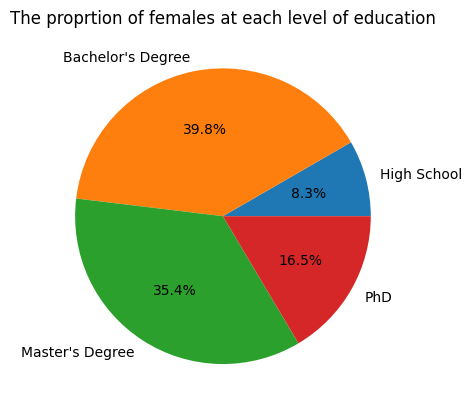

In [40]:
females = df_salary_data[df_salary_data['Gender'] == 'Female']
total_females = females['Education Level'].count()
print(f"The total number of females are {total_females}")


high_school_females = females.groupby('Education Level').count().loc["High School", 'Age']
bachelors_females = females.groupby('Education Level').count().loc["Bachelor's Degree", 'Age']
masters_females = females.groupby('Education Level').count().loc["Master's Degree", 'Age']
phd_females = females.groupby('Education Level').count().loc["PhD", 'Age']

values_n = [high_school_females, bachelors_females, masters_females, phd_females]
plt.title('The proprtion of females at each level of education')
plt.pie(values_n, labels=["High School", "Bachelor's Degree","Master's Degree", "PhD"], startangle=0, autopct='%1.1f%%');
plt.show()

##### Again, we can see that the total number of females in the population is 3013. Out of which; 39.8% have bachelor degrees, 35.4% have master's degree, 16.5% have PhD and 8.3% have high school certificates.

## The section below contains graphs of the proportion of the different genders at each level of education

#### High School

The total number of individuals who have high school certificates are 448


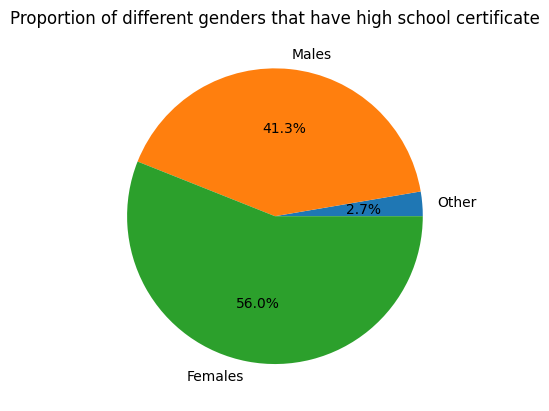

In [41]:
high_school = df_salary_data[df_salary_data['Education Level'] == 'High School']
total_high_school = high_school['Gender'].count()
high_school['Gender'].unique()
print(f"The total number of individuals who have high school certificates are {total_high_school}")


high_school_others = high_school.groupby('Gender').count().loc['Other', 'Age']
high_school_males = high_school.groupby('Gender').count().loc['Male', 'Age']
high_school_females = high_school.groupby('Gender').count().loc['Female', 'Age']

values = [high_school_others, high_school_males, high_school_females]

plt.title('Proportion of different genders that have high school certificate')
plt.pie(values, labels=['Other','Males', 'Females'], autopct='%1.1f%%', startangle=0);
plt.show()

##### From the above graph, we can see that 448 individuals have high school certificates and out of the total, 41.3% are males, 56.0% are females and 2.7% have genders other than male/female

#### Bachelor's Degree

The total number of individuals who have bachelor's degrees are 3022


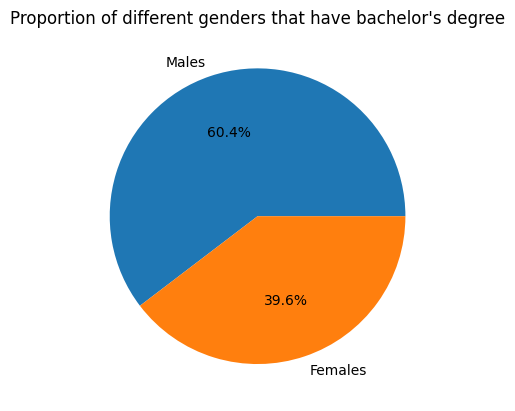

In [42]:
bachelors = df_salary_data[df_salary_data['Education Level'] == "Bachelor's Degree"]
total_bachelors = bachelors['Gender'].count()
bachelors['Gender'].unique()
print(f"The total number of individuals who have bachelor\'s degrees are {total_bachelors}")


# bachelors_others = bachelors.groupby('Gender').count().loc['Other', 'Age']
bachelors_males = bachelors.groupby('Gender').count().loc['Male', 'Age']
bachelors_females = bachelors.groupby('Gender').count().loc['Female', 'Age']

values = [bachelors_males, bachelors_females]

plt.title('Proportion of different genders that have bachelor\'s degree')
plt.pie(values, labels=['Males', 'Females'], autopct='%1.1f%%', startangle=0);
plt.show()

##### From the graph above, it is obvious that all individuals who have attained a bachelor's degree identify as either males or females. The males dominate with 60.4% out of a total of 3022 individuals..

#### Master's Degree

The total number of individuals who have master's degrees are 1861


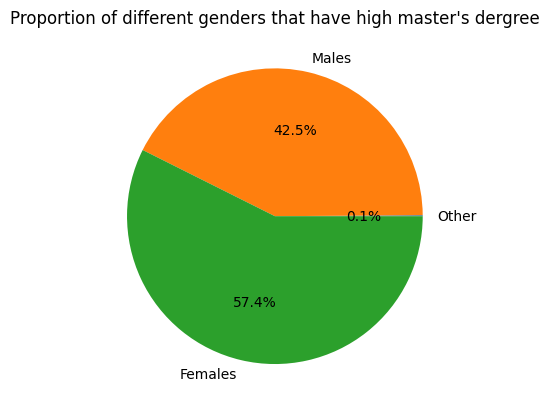

In [43]:
masters = df_salary_data[df_salary_data['Education Level'] == "Master's Degree"]
total_masters = masters['Gender'].count()
masters['Gender'].unique()
print(f"The total number of individuals who have master\'s degrees are {total_masters}")


masters_others = masters.groupby('Gender').count().loc['Other', 'Age']
masters_males = masters.groupby('Gender').count().loc['Male', 'Age']
masters_females = masters.groupby('Gender').count().loc['Female', 'Age']

values = [masters_others, masters_males, masters_females]

plt.title('Proportion of different genders that have high master\'s dergree')
plt.pie(values, labels=['Other','Males', 'Females'], autopct='%1.1f%%', startangle=0);
plt.show()

##### There are 1861 individuals who have attained a master's degree. Out of the total, only 0.1% have genders other than male/female. 57.4% are females and 42.5% are males.

#### PhD

The total number of individuals with PhD are 1369


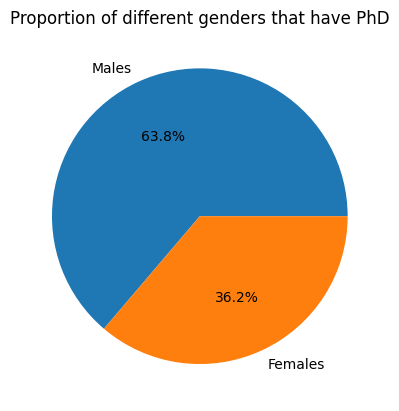

In [44]:
phd = df_salary_data[df_salary_data['Education Level'] == "PhD"]
total_phd = phd['Gender'].count()
phd['Gender'].unique()
print(f"The total number of individuals with PhD are {total_phd}")


# phd_others = phd.groupby('Gender').count().loc['Other', 'Age']
phd_males = phd.groupby('Gender').count().loc['Male', 'Age']
phd_females = phd.groupby('Gender').count().loc['Female', 'Age']

values = [phd_males, phd_females]

plt.title('Proportion of different genders that have PhD')
plt.pie(values, labels=['Males', 'Females'], autopct='%1.1f%%', startangle=0);
plt.show()

##### Out of the total indiduals of 1369, 63.8% are males and 36.2% are females. They are no other genders that have attained PhD.

<Axes: xlabel='Gender', ylabel='Salary'>

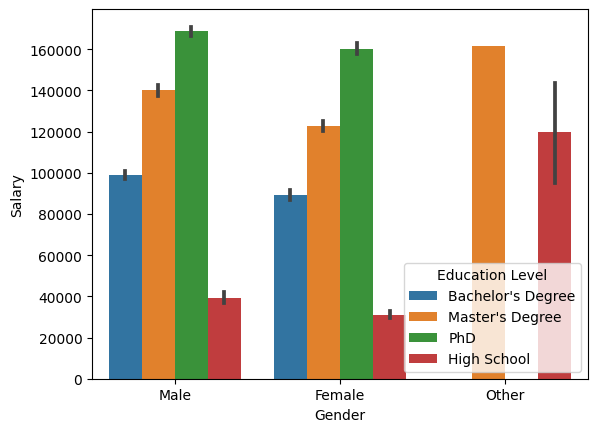

In [50]:
snb.barplot(x='Gender',y='Salary',data=df_salary_data )

In [51]:
df_salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
